# Anchor Generation Tutorial 

Download the example lanelet2 map used in this tutorial

In [1]:
%%capture
%pip install requests==2.31.0

import requests
from pathlib import Path

osm_file = "mapping_example.osm"
response = requests.get(
    "https://raw.githubusercontent.com/fzi-forschungszentrum-informatik/Lanelet2/master/lanelet2_maps/res/mapping_example.osm"
)
Path(osm_file).write_text(response.text)

Load the lanelet2 map as follows:

In [2]:
from lanelet2anchors import AnchorGenerator

lanelet_map = AnchorGenerator(
    osm_file=osm_file, origin_latitude=49.00345654351, origin_longitude=8.42427590707
)

Starting from a given lanelet id, we create all possible anchors within the map up until a fixed length of 100 meters. The resulting anchors are sorted based on their diversity. 

In [3]:
anchors = lanelet_map.create_anchors_for_lanelet(
    lanelet_id=lanelet_map.lanelet_ids[0], anchor_length=100
)

## Utility tools

Examples for lanelet interpolation at given ratios:

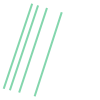

In [4]:
from shapely.ops import unary_union

unary_union(
    [
        lanelet_map.interpolate_lanelet(
            lanelet_id=lanelet_map.lanelet_ids[0], ratio=0.0
        ),
        lanelet_map.interpolate_lanelet(
            lanelet_id=lanelet_map.lanelet_ids[0], ratio=0.5
        ),
        lanelet_map.interpolate_lanelet(
            lanelet_id=lanelet_map.lanelet_ids[0], ratio=0.8
        ),
        lanelet_map.interpolate_lanelet(
            lanelet_id=lanelet_map.lanelet_ids[0], ratio=1.0
        ),
    ]
)

Example for detecting vehicles ahead. In this case, we use a dummy vehicle ahead mapping with zero vehicles in total.

In [5]:
from lanelet2anchors import find_vehicle_ahead
from shapely.geometry import Point

lanelet2vehicle = {lanelet: [] for anchor in anchors for lanelet in anchor.lanelets}

find_vehicle_ahead(
    anchors=anchors, lanelet2vehicle=lanelet2vehicle, current_position=Point(0, 0)
)
pass

Example usage of the anchor2linestring method. The ouput shows the left and right boundaries, as well as the centerline.

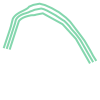

In [6]:
from lanelet2anchors import anchor2linestring
from shapely.ops import unary_union

unary_union(
    [
        anchor2linestring(anchor=anchors[0], line_type="left"),
        anchor2linestring(anchor=anchors[0], line_type="right"),
        anchor2linestring(anchor=anchors[0], line_type="center"),
    ]
)